## Import Dependencies

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [3]:
!cp -r /content/drive/MyDrive/ML_PROJECTS/Recomendation_System/Music_Recomendation_System/spotify_millsongdata.csv.zip /content/

In [5]:
!unzip /content/spotify_millsongdata.csv.zip

Archive:  /content/spotify_millsongdata.csv.zip
  inflating: spotify_millsongdata.csv  


In [7]:
df = pd.read_csv('/content/spotify_millsongdata.csv')

In [8]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [9]:
print(f"Number of Columns: {len(df.columns)}\n\n{df.columns}")

Number of Columns: 4

Index(['artist', 'song', 'link', 'text'], dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [11]:
df.isna().sum()

,0
artist,0
song,0
link,0
text,0


In [14]:
# Artist details
df['artist'].value_counts()

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
...,...
Ungu,2
U-Kiss,1
Zoe,1


In [15]:
## Since link is not going to play role in recomendation of the music, we can simply drop the link column
df.drop('link', axis=1, inplace=True)
df.sample(1)

,artist,song,text
2887,Christina Aguilera,"Get Mine, Get Yours",Baby you pretend that things ain't what they s...


## Ploting wordcloud

In [22]:
## word cloud
all_lyrics = "".join(df['text'].dropna())
wordcloud = WordCloud(height=200, width=800, background_color="white").generate(all_lyrics)

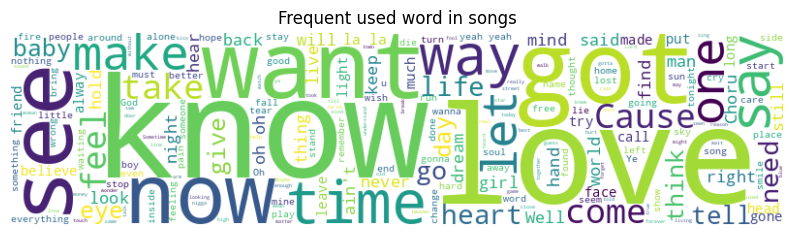

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent used word in songs")
plt.show()

## Data Processing

In [30]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stop_words = set(stopwords.words('english'))

In [37]:
## Building a function to process the data
def process(text):
  # Remove special characters
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Lower case all the text
  text = text.lower()

  # Tokenize the text
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]

  # Join tokens back to string (optional, for word cloud)
  return " ".join(tokens)